## Read .txt file

In [2]:
import numpy as np
import re
import datetime

from src.utils import modif_plot
from src.utils import quickplot

In [6]:
# read SIT observations

# summaries
# idir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified-sea-ice-thickness-cdr-1947-2017/'
idir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/unified-sea-ice-thickness-cdr-1947-2017/'
ifile = 'IceBridge-QL.summaries.2012.2015.V20160310.txt'
name = 'IceBridge-QL'

# ifile = 'IceBridge-V2.summaries.2009.2013.V20160310.txt'
# name = 'IceBridge-V2'

# data from november 2010 to February 2016

In [7]:
with open(f'{idir}{ifile}','r') as f:
    lines = f.readlines()

In [8]:
header = [item for item in re.split(' +', lines[0])][1:-1] + ['First'] 

In [9]:
header

['Source',
 'Campaign',
 'Index',
 'Year',
 'Yday',
 'MinDay',
 'MaxDay',
 'Month',
 'Lat',
 'Lon',
 'MinLat',
 'MaxLat',
 'MinLon',
 'MaxLon',
 'Length',
 'Nsamps',
 'Avg_snow',
 'Min_snow',
 'Max_snow',
 'SD_snow',
 'Avg_thunc',
 'Min_thunc',
 'Max_thunc',
 'SD_thunc',
 'Avg_thkns',
 'Min_thkns',
 'Max_thkns',
 'First']

In [10]:
data = np.genfromtxt(f'{idir}{ifile}', delimiter='\t', dtype='U255', skip_header=1, autostrip=True)

This type of data in the .txt file.
We get the data type from the documentation file:

In [11]:
data[0]

'IceBridge-QL 2012-GrnlQL  16100000   2012   76.8   76.8   76.8      3   67.28 -168.74   67.04   67.51 -168.80 -168.10     40       851      0.10      0.00      0.61      0.07      1.09      0.67      1.77      0.25      2.24      0.34     10.08      1.26'

In [12]:
types_data = ['U12','U12', 'int', 'int']+ ['float']*3 +['int']+ ['float']*6+ ['int', 'int']+ ['float']*12

In [13]:
# array with all the lines
arr = []
for dt in data:
    arr += [item for item in re.split(' +', dt)]

In [14]:
nlines = data.shape[0]
bb = np.array(arr).reshape(nlines,28)

In [15]:
# create dictionary from the array
dico = {}

for idx, (var, typecol) in enumerate(zip(header, types_data)):
    # format data
    if typecol == 'U12':
        typec = 'U12'
    elif typecol == 'float':
        typec = np.float64
    elif typecol == 'int':
        typec = np.int64
        
    dico[f'{var}'] = np.asarray(bb[:,idx], dtype=typec)

In [16]:
dico;

In [17]:
dico['Avg_thkns'];

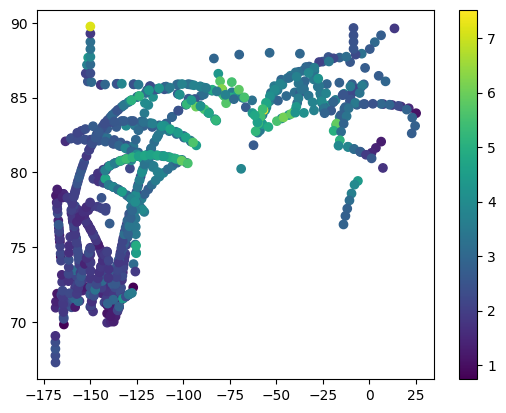

In [18]:
import matplotlib.pyplot as plt
plt.scatter(dico['Lon'], dico['Lat'], c=dico['Avg_thkns'])
plt.colorbar()

In [141]:
from importlib import reload
reload(quickplot);

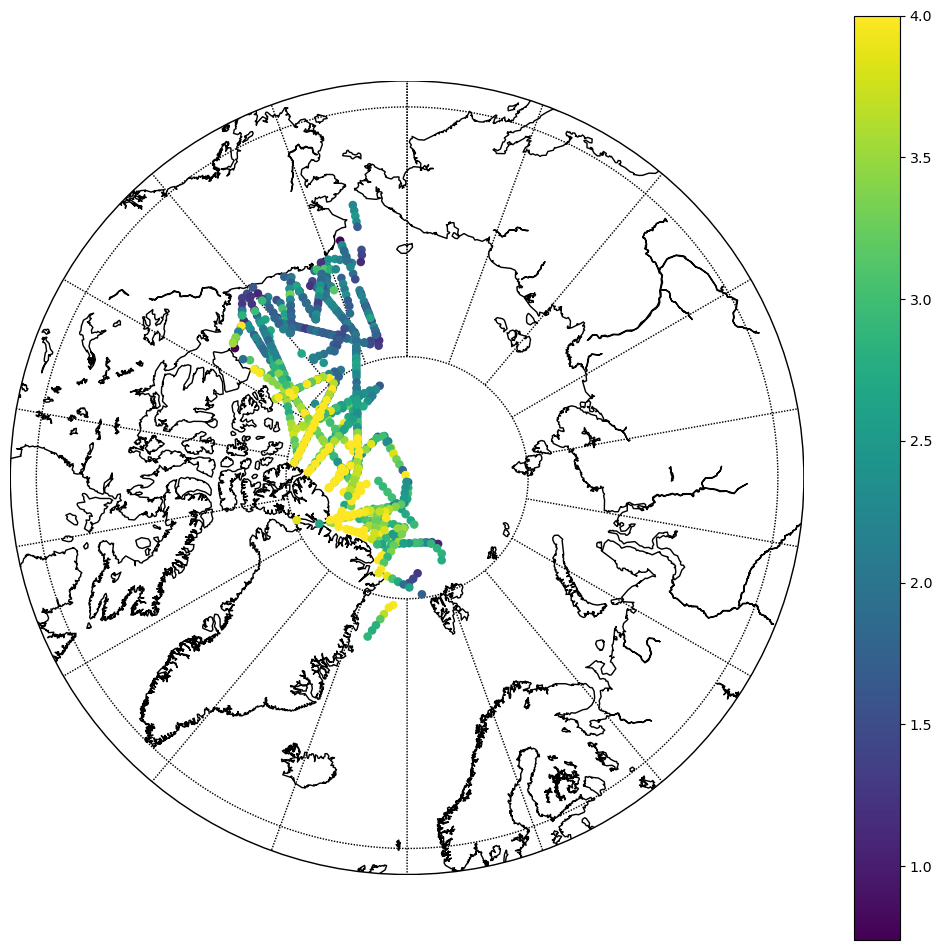

In [20]:
# index = np.where((dico['Year']==2011) & (dico['Month']==12))

savefig = True
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'

filename = f'{name}_summaries_SIT_obs_201112.png'
ofile = f'{odir}{filename}'

# quickplot.basemap(dico['Lon'][index], dico['Lat'][index], var=dico['Avg_thkns'][index], savefig=savefig, ofile=ofile, vmax=4, label='SIT (m)')
quickplot.basemap(dico['Lon'], dico['Lat'], var=dico['Avg_thkns'], savefig=False, ofile=ofile, vmax=4, label='SIT (m)')



In [47]:
dt = np.array([datetime.datetime(int(yr),1,1)+ datetime.timedelta(days=ydy) for yr, ydy in zip(dico['Year'], dico['Yday'])])

In [94]:
dt_min = np.array([datetime.datetime(int(yr),1,1)+ datetime.timedelta(days=ydy) for yr, ydy in zip(dico['Year'], dico['MinDay'])])
dt_max = np.array([datetime.datetime(int(yr),1,1)+ datetime.timedelta(days=ydy) for yr, ydy in zip(dico['Year'], dico['MaxDay'])])

(15340.0, 16071.0)

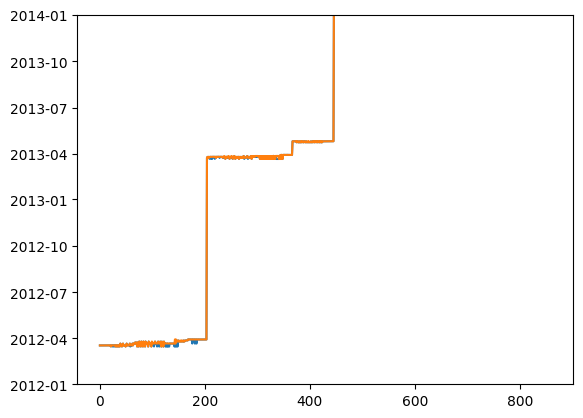

In [98]:
plt.plot(dt_min)
plt.plot(dt_max)
plt.ylim([datetime.datetime(2012,1,1), datetime.datetime(2014,1,1)])

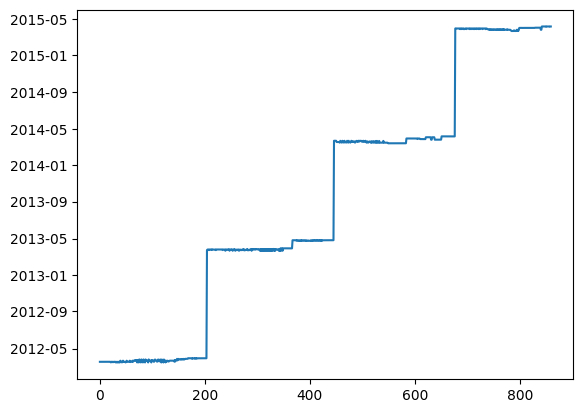

In [64]:
plt.plot(dt)
# plt.plot(dico['Year'])

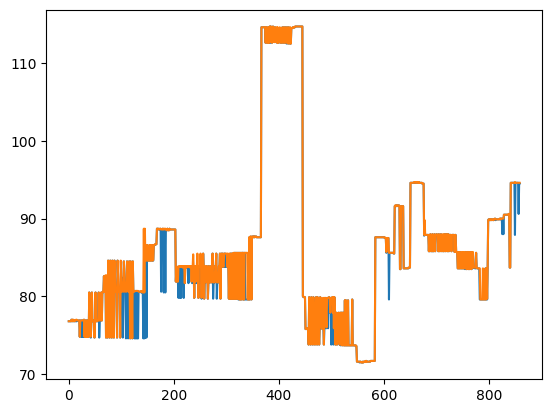

In [93]:
plt.plot(dico['MinDay'])
plt.plot(dico['MaxDay'])

In [61]:
# just for plot
dt_sec = np.array([(t0-datetime.datetime(1970,1,1)).total_seconds() for t0 in dt])

In [74]:
dico.keys()

dict_keys(['Source', 'Campaign', 'Index', 'Year', 'Yday', 'MinDay', 'MaxDay', 'Month', 'Lat', 'Lon', 'MinLat', 'MaxLat', 'MinLon', 'MaxLon', 'Length', 'Nsamps', 'Avg_snow', 'Min_snow', 'Max_snow', 'SD_snow', 'Avg_thunc', 'Min_thunc', 'Max_thunc', 'SD_thunc', 'Avg_thkns', 'Min_thkns', 'Max_thkns', 'First'])

In [90]:
np.where(dt<datetime.datetime(2013,1,1))[0][-1]

203

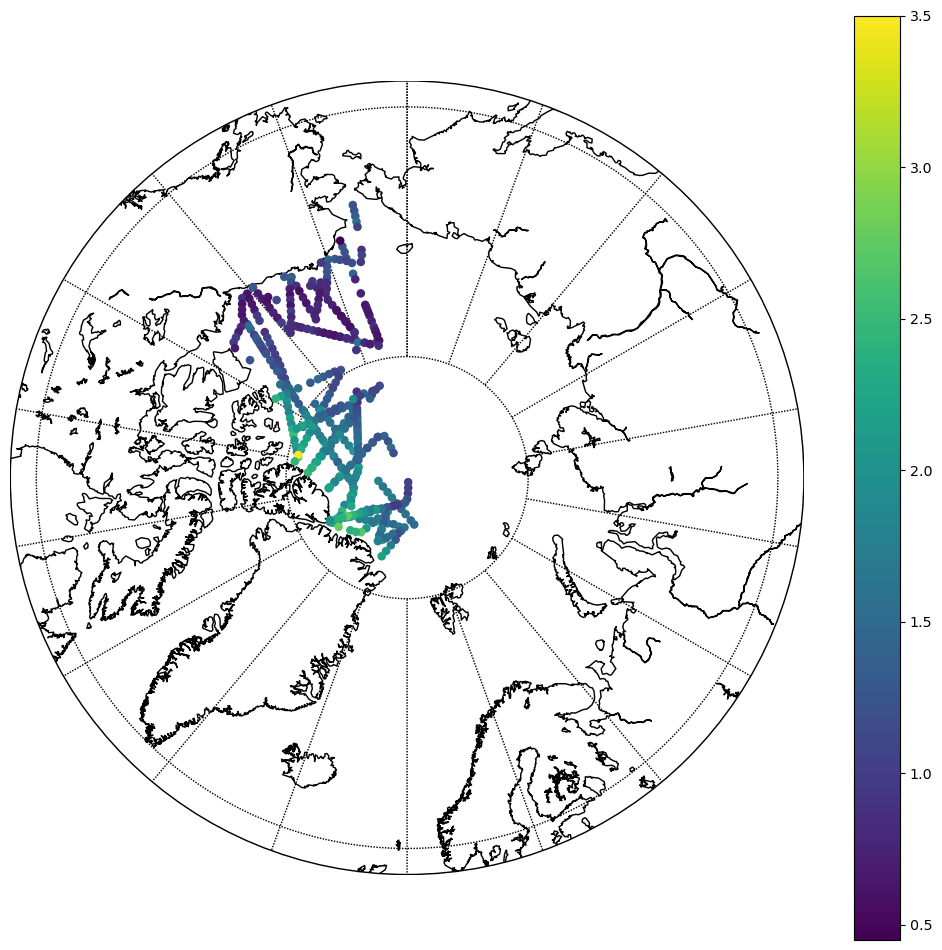

In [80]:
quickplot.basemap(dico['Lon'][:446], dico['Lat'][:446], var=dico['First'][:446], label='Datetime')

## Get monthly mean

In [144]:
# dataset average monthly from 01-2010 to 12-2016 
sitmm = np.nan * np.ones(shape=(12*7))
nind = np.nan * np.ones(shape=(12*7))
i = 0

for yr in range(2010,2017):
    for m in range(1,13):
        indexes = np.where((dico['Year']==yr) & (dico['Month']==m))[0]
        sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])
        nind[i] = len(indexes)
#         if nind[i] >0: break
        i += 1



/tmp/ipykernel_78228/3639635974.py:9: RuntimeWarning: Mean of empty slice
  sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])


In [145]:
# np.where((dico['Year']==2016) & (dico['Month']==2))

In [146]:
month_labels = ['Mar','Jun','Sept','Dec']*6 + ['Mar','Jun']
year_labels = ['2010','2011','2012','2013','2014','2015','2016']

## Save dataset in a ready to use format

For now, monthly mean is sufficient:

In [147]:
# save as .npz
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
ofile = f'{name}_summaries_SIT_monthlymean.npy'

np.save(f'{odir}{ofile}', sitmm)


## Plot monthly mean

/cluster/home/leoede/tardis/tardis-ml/src/utils/modif_plot.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(lably, fontsize = s)


Figure saved as: /nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/IceBridge-QL_summaries_SIT_monthlymean.png


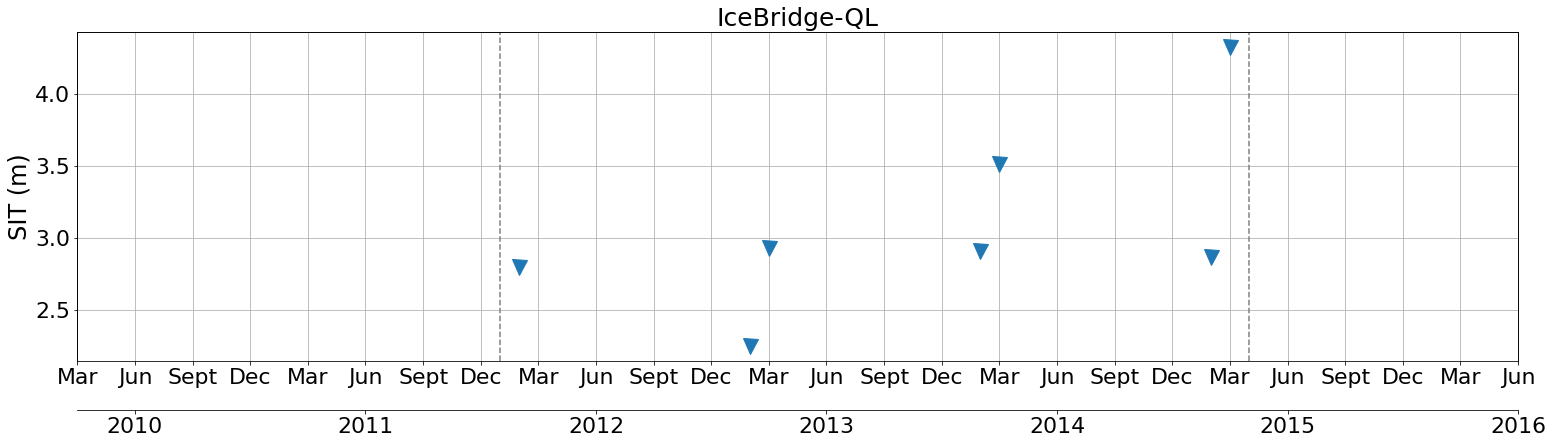

In [148]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(sitmm, 'v', ms=15)
plt.ylabel('SIT (m)')
plt.title(f'{name}')

if 'QL' in name:
    plt.axvline(25, c='gray',ls='--')
    plt.axvline(64, c='gray',ls='--')
if 'V2' in name:
    plt.axvline(48, c='gray',ls='--')
    


ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))
fig.tight_layout()

modif_plot.resize(fig, 22)


if True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'{name}_summaries_SIT_monthlymean.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')

Figure saved as: /nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/IceBridge-QL_summaries_SIT_monthlyObs.png


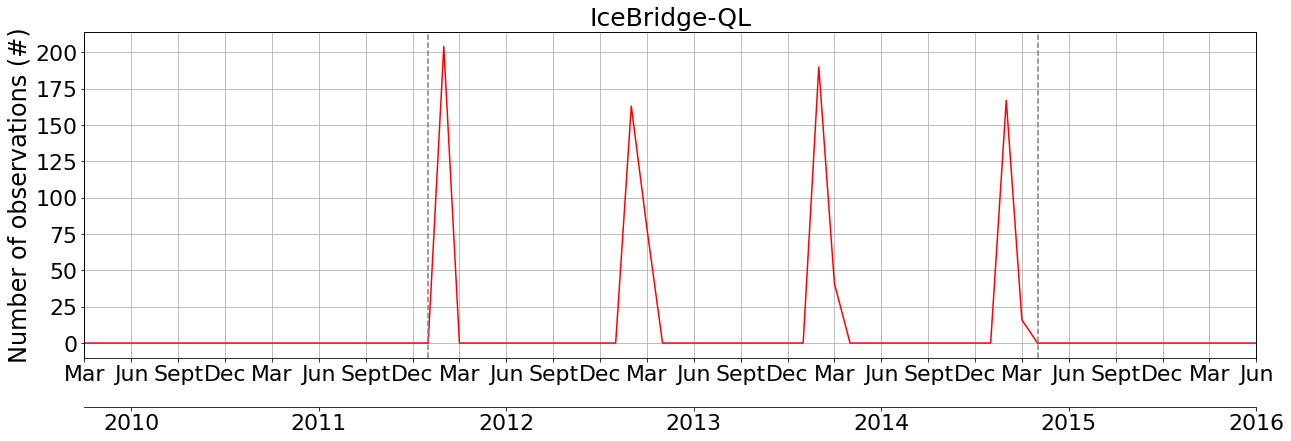

In [150]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(nind, 'r')
plt.ylabel('Number of observations (#)')
plt.title(f'{name}')

if 'QL' in name:
    plt.axvline(25, c='gray',ls='--')
    plt.axvline(64, c='gray',ls='--')
    plt.xlim([3,78])
if 'V2' in name:
    plt.axvline(48, c='gray',ls='--')
    plt.xlim([0,78])

ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

modif_plot.resize(fig, 22)

if True:  # True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'{name}_summaries_SIT_monthlyObs.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')